In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from collections import OrderedDict

majorLocator   = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)

def db2mag(x):
    if isinstance(x, list):
        return [db2mag(val) for val in x]
    return 10**(x/20)

def hz_to_sample(x, sample_rate):
    if isinstance(x, list):
        return [hz_to_sample(x, sample_rate) for val in x]
    return x * (2*np.pi / sample_rate)

def sample_to_hz(x, sample_rate):
    if isinstance(x, list):
        return [sample_to_hz(x, sample_rate) for val in x]
    
    return (sample_rate/2)*(x / (np.pi))

%pylab inline

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

sample_rate = 1000
nyquist = sample_rate/2
freqs = [0, 58, 59, 60,  61, 62, 63, nyquist]
gains = [1, 1, -80, -80, -80, 1, 1, 1]


gains = db2mag(gains)
gains[0] = 0
gains[-1] = 0

ideal_filter_freqs = []
ideal_filter_gains = []

for freq in range(0, 59):
    ideal_filter_freqs.append(freq)
    ideal_filter_gains.append(0)

for freq in range(59, 62):
    ideal_filter_freqs.append(freq)
    ideal_filter_gains.append(-80)
    
for freq in range(62, int(nyquist)):
    ideal_filter_freqs.append(freq)
    ideal_filter_gains.append(1)



Populating the interactive namespace from numpy and matplotlib


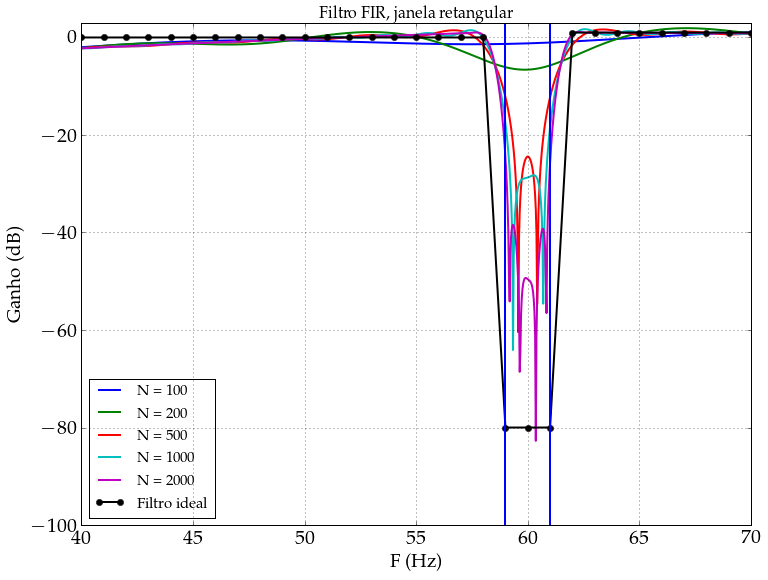

In [13]:
fig = plt.figure(1, figsize=(12,9))
freq_range = np.linspace(hz_to_sample(40, sample_rate), hz_to_sample(70, sample_rate), 1000)
leg = []

for tap_number in [100, 200, 500, 1000, 2000]:
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window='boxcar')
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w, 20 * np.log10(abs(h)), linewidth=2)
    leg.append("N = {}".format(tap_number))
    
plt.grid()
plt.title('Filtro FIR, janela retangular', fontsize=16)
plt.plot(ideal_filter_freqs, ideal_filter_gains, 'k-o', linewidth=2)
leg.append("Filtro ideal")
plt.axis([40, 70, -100, 3])
plt.legend(leg, loc="best", fontsize=15)
plt.xlabel('F (Hz)', fontsize=19)
plt.ylabel('Ganho (dB)', fontsize=19)
plt.axvline(59, color='blue', linewidth=2)
plt.axvline(61, color='blue', linewidth=2)
plt.savefig('bandstop_FIR_rectangular_window.eps')

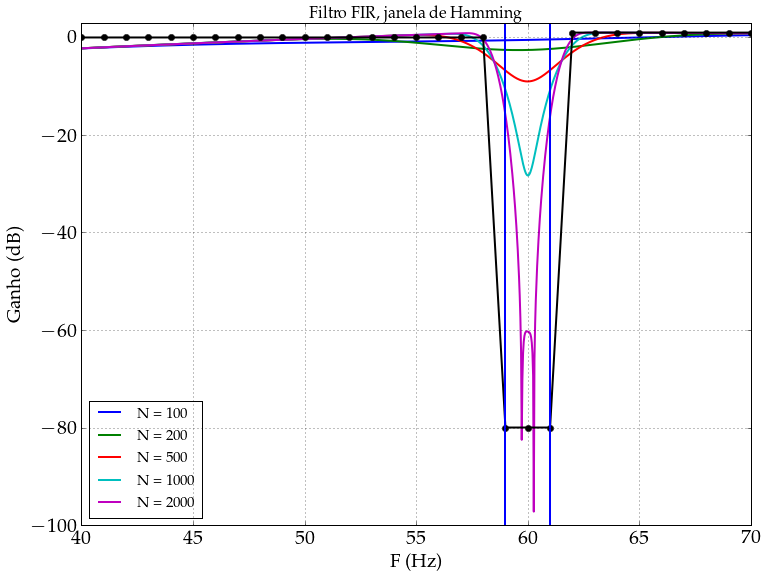

In [14]:
fig = plt.figure(1, figsize=(12,9))
freq_range = np.linspace(hz_to_sample(40, sample_rate), hz_to_sample(70, sample_rate), 1000)
leg = []

for tap_number in [100, 200, 500, 1000, 2000]:
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window='hamming')
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w, 20 * np.log10(abs(h)), linewidth=2)
    leg.append("N = {}".format(tap_number))
    

plt.grid()
plt.title('Filtro FIR, janela de Hamming', fontsize=16)
plt.legend(leg, loc="best", fontsize=15)
plt.plot(ideal_filter_freqs, ideal_filter_gains, 'k-o', linewidth=2)
leg.append("Filtro ideal")
plt.axis([40, 70, -100, 3])
plt.xlabel('F (Hz)', fontsize=19)
plt.ylabel('Ganho (dB)', fontsize=19)
plt.axvline(59, color='blue', linewidth=2)
plt.axvline(61, color='blue', linewidth=2)
plt.savefig('bandstop_FIR_hamming_window.eps')

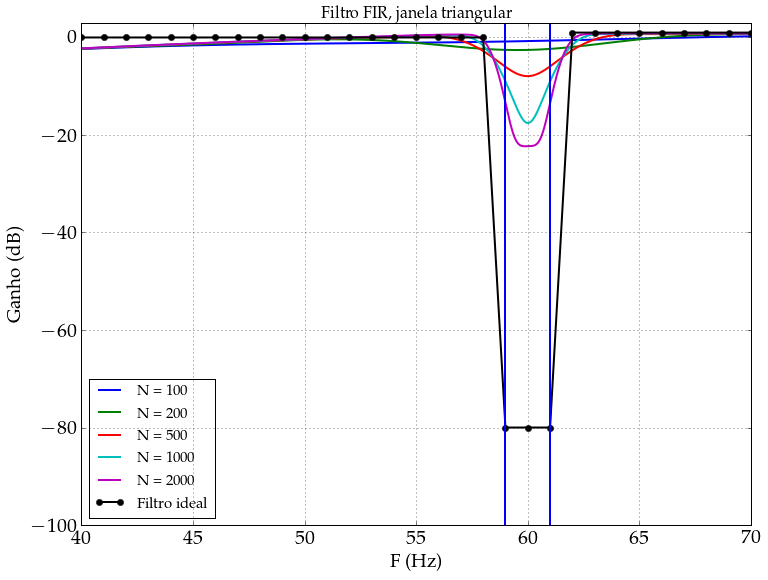

In [15]:
fig = plt.figure(1, figsize=(12,9))
freq_range = np.linspace(hz_to_sample(40, sample_rate), hz_to_sample(70, sample_rate), 1000)
leg = []

for tap_number in [100, 200, 500, 1000, 2000]:
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window='triang')
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w, 20 * np.log10(abs(h)), linewidth=2)
    leg.append("N = {}".format(tap_number))
    

plt.title('Filtro FIR, janela triangular', fontsize=16)
plt.plot(ideal_filter_freqs, ideal_filter_gains, 'k-o', linewidth=2)
leg.append("Filtro ideal")
plt.axis([40, 70, -100, 3])
plt.legend(leg, loc="best", fontsize=15)
plt.xlabel('F (Hz)', fontsize=19)
plt.ylabel('Ganho (dB)', fontsize=19)
plt.grid()
plt.axvline(59, color='blue', linewidth=2)
plt.axvline(61, color='blue', linewidth=2)
plt.savefig('bandstop_FIR_triang_window.eps')

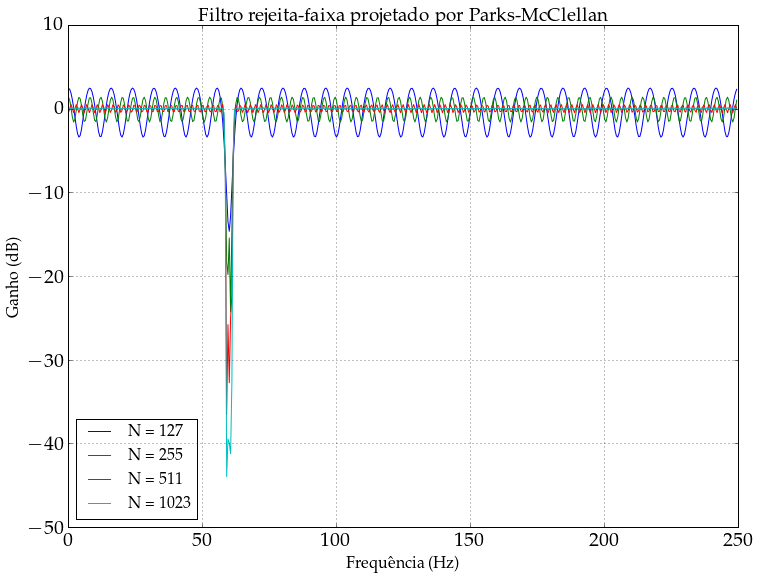

In [4]:
# Número de taps PRECISA ser ímpar para filtro bandstop
# Fonte: http://stackoverflow.com/questions/27754979/python-scipy-signal-remez-high-pass-filter-design-yields-strange-transfer-functi

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

for taps in [127, 255, 511, 1023]:
#for taps in [128, 256, 512, 1024, 2048]:
    bpass = signal.remez(taps, [0, 58, 59, 61, 62, 250], [1, 1e-12, 1], Hz=500, maxiter=1000)  
    freq, response = signal.freqz(bpass)
    ampl = np.abs(response)
    ax1.plot(500*freq/(2*np.pi), 20*log10(ampl))  # freq in Hz
    
plt.xlabel("Frequ\^encia (Hz)", fontsize=16)
plt.ylabel("Ganho (dB)", fontsize=16)
plt.title("Filtro rejeita-faixa projetado por Parks-McClellan", fontsize=19)
plt.grid()
plt.legend(["N = 127", "N = 255", "N = 511", "N = 1023"], fontsize=16, loc='best')
plt.savefig("bandstop_fir_pm.eps")